In [1]:
# ----- LIBS
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines

# Roteiro

- Configurações dos Gráficos
- Posicionamento de ED e GW
- Posicionamento de ED e GW e prédios 2D
- Posicionamento de ED e GW e prédios 3D

# Configurações dos Gráficos

- Limites dos eixos X e Y
- Tamanho dos gráficos
- Estilo das Legendas por Plot

In [2]:
# ----- PLOT SIZE SETTINGS

# chart bounds
xMin_bound, xMax_bound = 0, 4500
yMin_bound, yMax_bound = 0, 2800 

# chart figsize
x_figsize, y_figsize = 5, 5
x_3D_figsize, y_3D_figsize = 20, 20


In [3]:
# ----- LEGEND SETTINGS PER PLOT
def set_plots_legends():
   
    # legend list settings
    plots_legends = []
    
    # circle
#     circle_lgd = mlines.Line2D([], [],
#                               color = 'white',
#                               marker = 'o',
#                               markeredgecolor = 'black',
#                               markeredgewidth = 0.5,
#                               markerfacecolor = 'white',
#                               markersize = 15,
#                               label='Radio Coverage')

#     plots_legends.append(circle_lgd)
    
    # ED points
    colors = ['y','orange', 'green', 'blue', 'purple', 'black']
    for sf in range(len(colors)):
        scatter_lgd = mlines.Line2D([], [],
                                  color = 'white',
                                  marker = 'o',
                                  markeredgecolor = colors[sf],
                                  markeredgewidth = 0.5,
                                  markerfacecolor = colors[sf],
                                  markersize = 7, 
                                  label = 'SF' + str(sf + 7))
        plots_legends.append(scatter_lgd)
    
    
    # GW points
    scatter_lgd = mlines.Line2D([], [],
                                  color = 'white',
                                  marker = (5,2),
                                  markeredgecolor = 'red',
                                  markeredgewidth = 0.5,
                                  markerfacecolor = 'red',
                                  markersize = 15, 
                                  label = 'GW')

    plots_legends.append(scatter_lgd)
    
    return plots_legends

# Posicionamento de ED e GW

- Posicionamento em x, y, z
- Representação de SF de cada ED por meio de cores

In [4]:
# ----- NETWORK DATASET

network_df = pd.read_csv("network_results.csv") 
print("Total rows:", len(network_df))
network_df.head(5)

Total rows: 50


,ed_id,ed_x,ed_y,ed_z,sf,gw_id,gw_x,gw_y,gw_z,distance
0,0.0,2129.960,-3726.5300,1.0,12.0,50.0,2500.0,2500.0,10.0,6237.52
1,1.0,2401.370,-1759.5500,1.0,12.0,50.0,2500.0,2500.0,10.0,4260.70
2,2.0,-378.473,-2576.6600,1.0,12.0,50.0,2500.0,2500.0,10.0,5835.93
3,3.0,-4287.580,-1788.2900,1.0,12.0,50.0,2500.0,2500.0,10.0,8028.75
4,4.0,-143.420,39.2569,1.0,12.0,50.0,2500.0,2500.0,10.0,3611.51


In [5]:
# ----- EDs LISTS per SF

eds_x_sf7 = []
eds_y_sf7 = []
eds_x_sf8 = []
eds_y_sf8 = []
eds_x_sf9 = []
eds_y_sf9 = []
eds_x_sf10 = []
eds_y_sf10 = []
eds_x_sf11 = []
eds_y_sf11 = []
eds_x_sf12 = []
eds_y_sf12 = []

for i in range (len(network_df)):
    if network_df.iloc[i].sf == 7.0:
        eds_x_sf7.append(network_df.iloc[i].ed_x)
        eds_y_sf7.append(network_df.iloc[i].ed_y)
    if network_df.iloc[i].sf == 8.0:
        eds_x_sf8.append(network_df.iloc[i].ed_x)
        eds_y_sf8.append(network_df.iloc[i].ed_y)
    if network_df.iloc[i].sf == 9.0:
        eds_x_sf9.append(network_df.iloc[i].ed_x)
        eds_y_sf9.append(network_df.iloc[i].ed_y)
    if network_df.iloc[i].sf == 10.0:
        eds_x_sf10.append(network_df.iloc[i].ed_x)
        eds_y_sf10.append(network_df.iloc[i].ed_y)
    if network_df.iloc[i].sf == 11.0:
        eds_x_sf11.append(network_df.iloc[i].ed_x)
        eds_y_sf11.append(network_df.iloc[i].ed_y)
    if network_df.iloc[i].sf == 12.0:
        eds_x_sf12.append(network_df.iloc[i].ed_x)
        eds_y_sf12.append(network_df.iloc[i].ed_y)

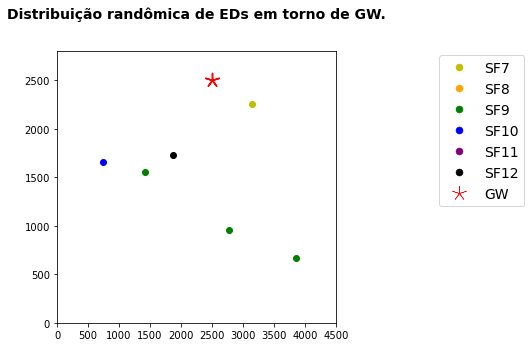

In [6]:
# ----- PLOT ED E GW

# plot initialize
fig, ax = plt.subplots(figsize=(x_figsize, y_figsize))

# draw a circle
# a_circle = plt.Circle((0, 0), xMax_bound, fill= False, linestyle = '--', linewidth = 1.5, label='Radio Coverage')
# ax.add_artist(a_circle)

# draw ED posxy per SF 
ax.scatter(eds_x_sf7, eds_y_sf7, color='y', label ='SF7')
ax.scatter(eds_x_sf8, eds_y_sf8, color='orange', label ='SF8')
ax.scatter(eds_x_sf9, eds_y_sf9, color='green', label ='SF9')
ax.scatter(eds_x_sf10, eds_y_sf10, color='blue', label ='SF10')
ax.scatter(eds_x_sf11, eds_y_sf11, color='purple', label ='SF11')
ax.scatter(eds_x_sf12, eds_y_sf12, color='black', label ='SF10')

# draw GW
ax.scatter(network_df.iloc[0].gw_x, network_df.iloc[0].gw_y, color='red', label ='GW', marker = (5,2), s = 200)
        
# legend settings
legends_list = set_plots_legends()
ax.legend(handles=[line for line in legends_list], loc="upper right", bbox_to_anchor=(1.7, 1.01), prop={'size': 14})

# chart bounds
ax.set(xlim=(xMin_bound, xMax_bound), ylim = (yMin_bound, yMax_bound))

# Title
ax.set_title('Distribuição randômica de EDs em torno de GW.', fontweight='bold', fontsize=14, y=1.1)
plt.show()
# fig.savefig('dist_rand_ed_gw.png',bbox_inches='tight')

# Posicionamento de ED, GW e prédios 2D

- Posicionamento em x, y, z de ED e GW
- Posicionamento xMin, yMin, xMax e yMax
- Representação 2D e ED, GW e prédios
- Representação 3D e ED, GW e prédios

In [7]:
# ----- BUILDING DATASET

buindings_df = pd.read_csv("buildings_dimensions.csv") 
print("Total de Prédios:", len(buindings_df))
buindings_df.head(5)

Total de Prédios: 509


,building_id,boundaries_xMin,boundaries_yMin,boundaries_xMax,boundaries_yMax,boundaries_zMax,boundaries_zMin
0,1.0,2185.00,2206.42,2228.60,2246.88,0.0,6.0
1,2.0,1706.88,1857.70,1733.00,1883.67,0.0,6.0
2,3.0,1476.58,1753.46,1534.54,1836.47,0.0,6.0
3,4.0,2073.98,2069.52,2163.68,2142.55,0.0,6.0
4,5.0,2173.35,2236.45,2219.25,2267.95,0.0,6.0


In [8]:
buindings_df.iloc[41]

building_id          42.00
boundaries_xMin    2592.85
boundaries_yMin    2262.36
boundaries_xMax    2635.12
boundaries_yMax    2328.48
boundaries_zMax       0.00
boundaries_zMin       6.00
Name: 41, dtype: float64

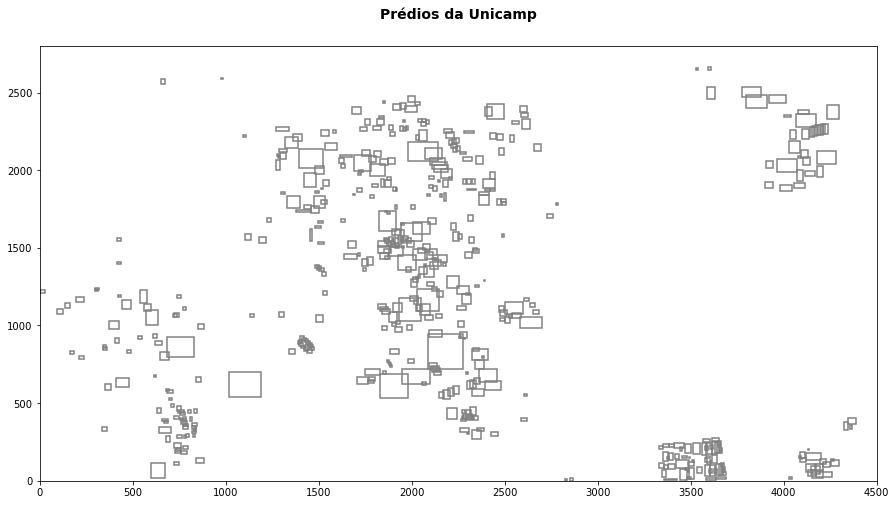

In [14]:
# ----- DRAW 2D BUILDINGS

# https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html

# Create figure and axes
fig, ax = plt.subplots(figsize=(15, 8))
# fig, ax = plt.subplots(figsize=(x_figsize, y_figsize))

# Create a Rectangle patch
# Rectangle(xy, width, height, angle=0.0, **kwargs) == (xMinYmin, xMax, yMax)
for i in range (len(buindings_df)):
    rect = patches.Rectangle(
        (buindings_df.iloc[i].boundaries_xMin, buindings_df.iloc[i].boundaries_yMin),
        buindings_df.iloc[i].boundaries_xMax - buindings_df.iloc[i].boundaries_xMin,
        buindings_df.iloc[i].boundaries_yMax - buindings_df.iloc[i].boundaries_yMin,
        linewidth = 1.5,
        edgecolor='gray',
        facecolor='none',
        label="Building"
    )

    # Add the patch to the Axes
    ax.add_patch(rect)      

# set axis limits
ax.set_xlim([xMin_bound, xMax_bound]) 
ax.set_ylim([yMin_bound, yMax_bound]) 

ax.set_title('Prédios da Unicamp', fontweight='bold', fontsize=14, y=1.05)

plt.show()

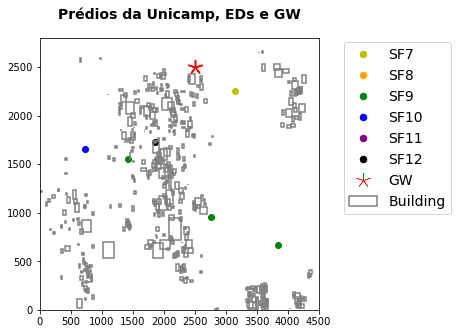

In [10]:
# ----- DRAW 2D BUILDINGS, EDs e GWs

# Create figure and axes
fig, ax = plt.subplots(figsize=(x_figsize, y_figsize))

# Create a Rectangle patch
# Rectangle(xy, width, height, angle=0.0, **kwargs) == (xMinYmin, xMax, yMax)
for i in range (len(buindings_df)):
    rect = patches.Rectangle(
        (buindings_df.iloc[i].boundaries_xMin, buindings_df.iloc[i].boundaries_yMin),
        buindings_df.iloc[i].boundaries_xMax - buindings_df.iloc[i].boundaries_xMin,
        buindings_df.iloc[i].boundaries_yMax - buindings_df.iloc[i].boundaries_yMin,
        linewidth = 1.5,
        edgecolor='gray',
        facecolor='none',
        label="Building"
    )

    # Add the patch to the Axes
    ax.add_patch(rect)


# draw ED posxy per SF 
ax.scatter(eds_x_sf7, eds_y_sf7, color='y', label ='SF7')
ax.scatter(eds_x_sf8, eds_y_sf8, color='orange', label ='SF8')
ax.scatter(eds_x_sf9, eds_y_sf9, color='green', label ='SF9')
ax.scatter(eds_x_sf10, eds_y_sf10, color='blue', label ='SF10')
ax.scatter(eds_x_sf11, eds_y_sf11, color='purple', label ='SF11')
ax.scatter(eds_x_sf12, eds_y_sf12, color='black', label ='SF10')

# draw GW
ax.scatter(network_df.iloc[0].gw_x, network_df.iloc[0].gw_y, color='red', label ='GW', marker = (5,2), s = 200)

# set axis limits
ax.set_xlim([xMin_bound, xMax_bound]) 
ax.set_ylim([yMin_bound, yMax_bound]) 

# legend settings
legends_list = set_plots_legends()
legends_list.append(rect)
                                    
ax.legend(handles=[line for line in legends_list], loc="upper right", bbox_to_anchor=(1.5, 1.01), prop={'size': 14})

ax.set_title('Prédios da Unicamp, EDs e GW', fontweight='bold', fontsize=14, y = 1.05)
plt.show()
# fig.savefig('dist_rand_ed_gw_building.png',bbox_inches='tight')

# Posicionamento de ED, GW e prédios 3D

- Posicionamento em x, y, z de ED e GW
- Representação 3D e ED, GW e prédios

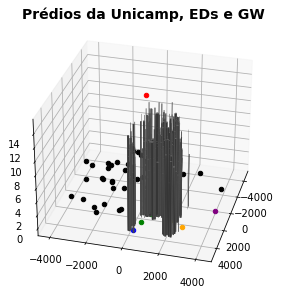

In [11]:
# ----- DRAW 3D BUILDINGS, EDs e GWs

# Three-Dimensional Plotting in Matplotlib
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

import random

fig = plt.figure(figsize=(x_figsize, y_figsize))
ax = plt.axes(projection="3d")

# Box bounds
x_pos = [ buindings_df.iloc[i].boundaries_xMin for i in range (len(buindings_df)) ]
y_pos = [ buindings_df.iloc[i].boundaries_yMin for i in range (len(buindings_df)) ]

x_size = [ (buindings_df.iloc[i].boundaries_xMax - buindings_df.iloc[i].boundaries_xMin) for i in range (len(buindings_df))]
y_size = [ (buindings_df.iloc[i].boundaries_yMax - buindings_df.iloc[i].boundaries_yMin) for i in range (len(buindings_df))]

num_bars = len(buindings_df)
z_pos = [0] * num_bars
# z_size = 6
z_size = [ (random.randint(3,15)) for i in range (len(buindings_df))]
# print(z_size)

# draw Buildings
ax.bar3d(x_pos, y_pos, z_pos, x_size, y_size, z_size, color='gray')

# draw ED
ed_z = 1
colors = ['y','orange', 'green', 'blue', 'purple', 'black']
for i in range (7, 7+ len(colors)):
    if i == 7:
        for x,y in zip(eds_x_sf7, eds_y_sf7):
            ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
    elif i == 8:
        for x,y in zip(eds_x_sf8, eds_y_sf8):
            ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
    elif i == 9:
        for x,y in zip(eds_x_sf9, eds_y_sf9):
            ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
    elif i == 10:
        for x,y in zip(eds_x_sf10, eds_y_sf10):
            ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
    elif i == 11:
        for x,y in zip(eds_x_sf11, eds_y_sf11):
            ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
    elif i == 12:
        for x,y in zip(eds_x_sf12, eds_y_sf12):
            ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);


# draw GW
ax.scatter3D(0, 0, 15,  color='red');

# legend settings
# legends_list = set_plots_legends()
# legends_list.append(rect)                                   
# ax.legend(handles=[line for line in legends_list], loc="upper right", bbox_to_anchor=(1.08, 0.8), prop={'size': 14})

ax.view_init(30, 15)
# ax.view_init(90, 20)

ax.set_title('Prédios da Unicamp, EDs e GW', fontweight='bold', fontsize=14, y = 1.05)
plt.show()
# fig.savefig('rep_3D_predios_gw.png',bbox_inches='tight')

In [12]:
# ----- DRAW 3D ELEMENTS: BUILDINGS, EDs e GWs

# Three-Dimensional Plotting in Matplotlib
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

def draw_elements(ax):

    # draw Buildings
    ax.bar3d(x_pos, y_pos, z_pos, x_size, y_size, z_size, color='gray')

    # draw ED
    ed_z = 1
    colors = ['y','orange', 'green', 'blue', 'purple', 'black']
    for i in range (7, 7+ len(colors)):
        if i == 7:
            for x,y in zip(eds_x_sf7, eds_y_sf7):
                ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
        elif i == 8:
            for x,y in zip(eds_x_sf8, eds_y_sf8):
                ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
        elif i == 9:
            for x,y in zip(eds_x_sf9, eds_y_sf9):
                ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
        elif i == 10:
            for x,y in zip(eds_x_sf10, eds_y_sf10):
                ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
        elif i == 11:
            for x,y in zip(eds_x_sf11, eds_y_sf11):
                ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);
        elif i == 12:
            for x,y in zip(eds_x_sf12, eds_y_sf12):
                ax.scatter3D(x, y, ed_z,  color = colors[abs(7-i)]);


    # draw GW
    ax.scatter3D(0, 0, 15,  color='red');

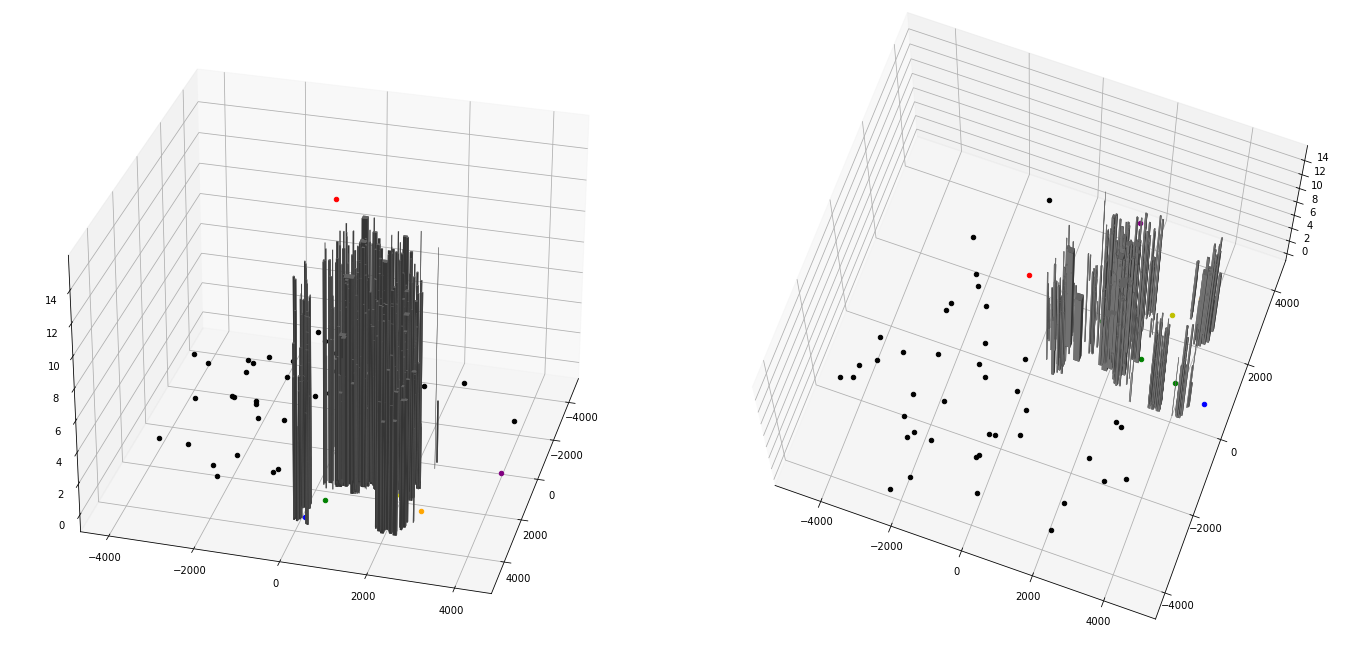

In [13]:
# ----- PLOT 3D CHARTS 3D BUILDINGS, EDs e GWs
# https://matplotlib.org/devdocs//gallery/mplot3d/subplot3d.html

fig = plt.figure(figsize=(x_3D_figsize, x_3D_figsize))
ax = fig.add_subplot(1, 2, 1, projection='3d')

# Box bounds
x_pos = [ buindings_df.iloc[i].boundaries_xMin for i in range (len(buindings_df)) ]
y_pos = [ buindings_df.iloc[i].boundaries_yMin for i in range (len(buindings_df)) ]

x_size = [ (buindings_df.iloc[i].boundaries_xMax - buindings_df.iloc[i].boundaries_xMin) for i in range (len(buindings_df))]
y_size = [ (buindings_df.iloc[i].boundaries_yMax - buindings_df.iloc[i].boundaries_yMin) for i in range (len(buindings_df))]

num_bars = len(buindings_df)
z_pos = [0] * num_bars
z_size = 6
z_size = [ (random.randint(3,15)) for i in range (len(buindings_df))]


# draw, perpective view position, title
draw_elements(ax)
ax.view_init(30, 15)
# ax.set_title('Prédios da Unicamp, EDs e GW', fontweight='bold', fontsize=14, y = 1.05)

# Second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
draw_elements(ax)
ax.view_init(70, -70)

# legend settings
# legends_list = set_plots_legends()
# legends_list.append(rect)                                   
# ax.legend(handles=[line for line in legends_list], loc="upper right", bbox_to_anchor=(1.08, 0.8), prop={'size': 14})


# space between subplots
fig.tight_layout(pad=5.0)
plt.show()


# fig.savefig('rep_3D_predios_gw.png',bbox_inches='tight')